# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [4]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\km4147\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


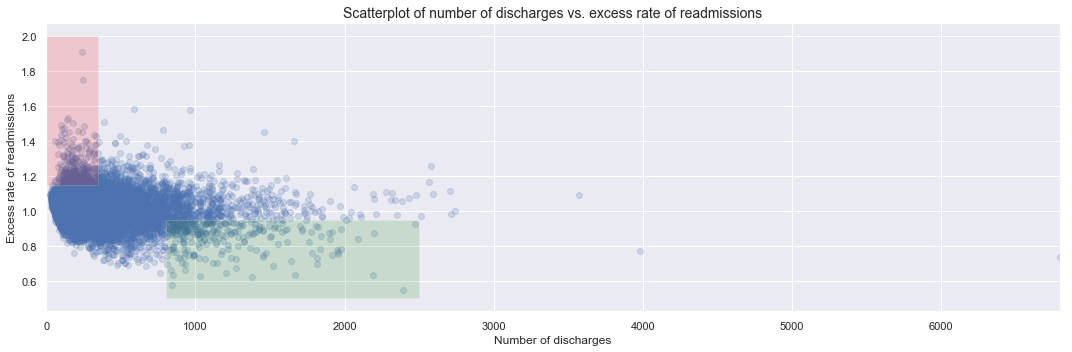

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = list(clean_hospital_read_df['Number of Discharges'][(clean_hospital_read_df['Number of Discharges'].notnull())&(clean_hospital_read_df['Excess Readmission Ratio'].notnull())])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][(clean_hospital_read_df['Number of Discharges'].notnull())&(clean_hospital_read_df['Excess Readmission Ratio'].notnull())])

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Answers
#### Preliminary analysis and recommendations:
* Visual analysis of data supports the stated preliminary analysis. 
* Visually, the density of dots in the red shaded area appear to be greater than that in the green shaded area and above it, which implies that the readmission rate in smaller hospitals is higher than that in larger hospitals
* The density of the plot above 1.0 on y-axis is very thick at the start of x-axis and gradually reduces along the axis, suggesting that the readmission rates are much higher for smaller hospitals and gradually decreases for larger hospitals.

#### Statistical Analysis
##### Hypothesis
H<sub>0</sub>: Readmission rate is the same irrespective of the hospital size (Radmission for small hospitals = Readmission for large hospitals)<br>
H<sub>a</sub>: Readmission rate is NOT the same irrespective of the hospital size (Radmission for small hospitals > Readmission for large hospitals)<br><br>


**Small size is num of discharges <=100, large is num of discharges >1000*

In [8]:
alpha = 0.01
num_iterations = 10000

def draw_bs_reps(data,func,size):
    bs_reps = np.empty(size)
    for i in np.arange(size):
        bs_reps[i]=func(np.random.choice(data,len(data),replace=True))
    return bs_reps

def getNumBins(numObs):
    num_bins = (int((1 + 3.322 * np.log(numObs))/5)+1)*5
    return num_bins

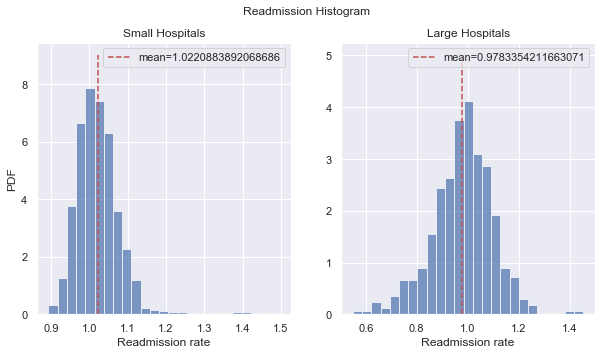

In [17]:
small_readmission = clean_hospital_read_df['Excess Readmission Ratio'][(clean_hospital_read_df['Excess Readmission Ratio'].notnull())&(clean_hospital_read_df['Number of Discharges']<=100)]
large_readmission = clean_hospital_read_df['Excess Readmission Ratio'][(clean_hospital_read_df['Excess Readmission Ratio'].notnull())&(clean_hospital_read_df['Number of Discharges']>1000)]

mu_small = np.mean(small_readmission)
mu_large = np.mean(large_readmission)
sigma_small = np.std(small_readmission)
sigma_large = np.std(large_readmission)
sem_small = sigma_small/np.sqrt(len(small_readmission))
sem_large = sigma_large/np.sqrt(len(large_readmission))

plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(small_readmission,bins=getNumBins(len(small_readmission)),density=1,alpha=0.7)
plt.vlines(mu_small,0,9,colors='r',linestyle='dashed',label='mean='+str(mu_small))
plt.suptitle('Readmission Histogram')
plt.title('Small Hospitals')
plt.xlabel('Readmission rate')
plt.ylabel('PDF')
plt.legend()

plt.subplot(1,2,2)
plt.hist(large_readmission,bins=getNumBins(len(large_readmission)),density=1,alpha=0.7)
plt.vlines(mu_large,0,5,colors='r',linestyle='dashed',label='mean='+str(mu_large))
plt.xlabel('Readmission rate')
plt.title('Large Hospitals')
plt.legend()

plt.show()

In [39]:
#Frequentist

t_fs,p_fs = stats.ttest_ind(small_readmission,large_readmission)

print('Frequentist method:')
print('    p-value using frequentist method:',p_bs)

if p_fs > alpha:
    print('    Fail to reject H0: The data is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT between readmission rates of small and large hospitals; readmission rate does not depend on hospital size')
else:
    print('    Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT between readmission rates of small and large hospitals; readmission rate is higher of smaller hospital.')
    

Frequentist method:
    p-value using frequentist method: 0.0
    Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT between readmission rates of small and large hospitals; readmission rate is higher of smaller hospital.


Small hospitals readmission mean =  1.0220997546443171
Small hospitals readmission mean 99% confidence interval =  [1.0206024076343436, 1.0235971016542906]
Large hospitals readmission mean =  0.9783872207559396
Large hospitals readmission mean 99% confidence interval =  [0.9752993761952568, 0.9814750653166225]


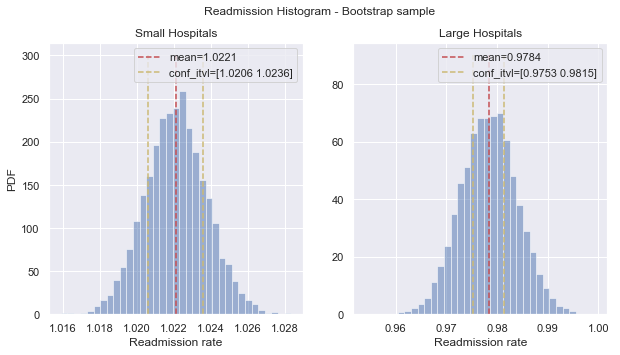

In [19]:
#Bootstrap

bs_small_readmission = draw_bs_reps(small_readmission,np.mean,num_iterations)
bs_large_readmission = draw_bs_reps(large_readmission,np.mean,num_iterations)

bs_small_readmit_mean = np.mean(bs_small_readmission)
bs_large_readmit_mean = np.mean(bs_large_readmission)
bs_small_readmit_sem = sigma_small/np.sqrt(len(bs_small_readmission))
bs_large_readmit_sem = sigma_large/np.sqrt(len(bs_large_readmission))

conf_small_99 = [bs_small_readmit_mean - stats.norm.ppf(1-alpha/2)*bs_small_readmit_sem, bs_small_readmit_mean + stats.norm.ppf(1-alpha/2)*bs_small_readmit_sem]
conf_large_99 = [bs_large_readmit_mean - stats.norm.ppf(1-alpha/2)*bs_large_readmit_sem, bs_large_readmit_mean + stats.norm.ppf(1-alpha/2)*bs_large_readmit_sem]

print('Small hospitals readmission mean = ',bs_small_readmit_mean)
print('Small hospitals readmission mean 99% confidence interval = ',conf_small_99)
print('Large hospitals readmission mean = ',bs_large_readmit_mean)
print('Large hospitals readmission mean 99% confidence interval = ',conf_large_99)

plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(bs_small_readmission,bins=getNumBins(len(bs_small_readmission)),density=1,alpha=0.5)
plt.vlines(bs_small_readmit_mean,0,300,colors='r',linestyle='dashed',label='mean='+str(np.round(bs_small_readmit_mean,4)))
plt.vlines(conf_small_99,0,300,colors='y',linestyle='dashed',label = 'conf_itvl='+str(np.round(conf_small_99,4)))
plt.suptitle('Readmission Histogram - Bootstrap sample')
plt.title('Small Hospitals')
plt.xlabel('Readmission rate')
plt.ylabel('PDF')
plt.legend()

plt.subplot(1,2,2)
plt.hist(bs_large_readmission,bins=getNumBins(len(bs_large_readmission)),density=1,alpha=0.5)
plt.vlines(bs_large_readmit_mean,0,90,colors='r',linestyle='dashed',label='mean='+str(round(bs_large_readmit_mean,4)))
plt.vlines(conf_large_99,0,90,colors='y',linestyle='dashed',label = 'conf_itvl='+str(np.round(conf_large_99,4)))
plt.xlabel('Readmission rate')
plt.title('Large Hospitals')
plt.legend()

#plt.tight_layout()
plt.show()

# p value


In [38]:
t_bs,p_bs = stats.ttest_ind(bs_small_readmission,bs_large_readmission)

print('Bootstrap method:')
print('    p-value using shifted mean bootstrap method:',p_bs)

if p_bs > alpha:
    print('    Fail to reject H0: The data is NOT STATISTICALLY SIGNIFICANTLY DIFFERENT between readmission rates of small and large hospitals; readmission rate does not depend on hospital size')
else:
    print('    Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT between readmission rates of small and large hospitals; readmission rate is higher of smaller hospital.')
    

Bootstrap method:
    p-value using shifted mean bootstrap method: 0.0
    Reject H0: The data is STATISTICALLY SIGNIFICANTLY DIFFERENT between readmission rates of small and large hospitals; readmission rate is higher of smaller hospital.


##### Conclusion
Based on the hypothesis test above using different methods, the data suggests that hospital size **DOES** affect the readmission rate and smaller hospitals tend to have higher readmission rates possibly due to their lack of resources to technologically keep up with the larger hospitals. 

#### Practical Significance vs Statistical Significance
Statistical significance suggested that the readmission rate for smaller hospitals are higher than that for larger hospitals. <br>
Practical significance on the other hand encourages to include context to the findings in stastical study. The issue here is healthcare, one of the most important problems facing the humanity and utmost importance is required for every case. The above analysis considers only the hospital size and no other valid factor like location, doctors, equipment, etc. Since we didn't consider any of these factors in our study, the practical significance of our tests is low. The model must be improve by considering other factors as well.

#### Scatter plot
Scatter plot shows the relationship between two or more variables effectively and can be a good plot to see the overall  correlation between factors and trends over time.<br>
However, for large datasets, scatter plot can be confusing to look at due to higher density of the dots and may not provide a complete picture. It requires the user to spend a lot of time analyzing the dots defeating the purpose of data visualization. Moreover, if the factors don't follow a certain trend / relationship, scatter plots provide little to no insight.

C:\Users\km4147\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


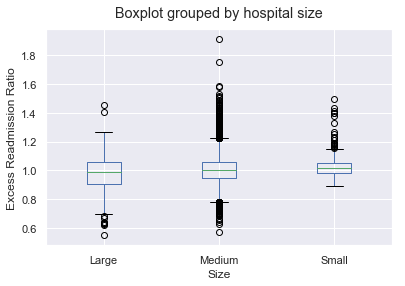

In [61]:
#Better plot

def getSize(NumDischarge):
    if NumDischarge <= 100:
        return 'Small'
    elif NumDischarge > 100 and NumDischarge <= 1000:
        return 'Medium'
    else:
        return 'Large'

plotting_df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
plotting_df['Size'] = [getSize(discharge) for discharge in plotting_df['Number of Discharges']]

plotting_df[['Size','Excess Readmission Ratio']].boxplot(column='Excess Readmission Ratio',by='Size')
plt.ylabel('Excess Readmission Ratio')
plt.suptitle('Boxplot grouped by hospital size')
plt.title('')
plt.show()

The boxplot above shows the means, confidence intervals, and outliers for different size hospitals. <br>
With just a glance at the chart, we can conclude that the mean of readmission ratio of smaller hospitals is greater than that of larger hospitals, and smaller hospitals have way more outliers upwards than larger hospitals do. 